In [8]:
from bs4 import BeautifulSoup
import requests
import pandas as pd 

In [39]:
website = 'https://www.cars.com/shopping/results/?stock_type=cpo&makes%5B%5D=&models%5B%5D=&list_price_max=&maximum_distance=20&zip='

In [40]:
response = requests.get(website)

In [41]:
response.status_code

200

In [42]:
soup = BeautifulSoup(response.content, 'html.parser')

In [43]:
results = soup.find_all('div', {'class' : 'vehicle-card'})

In [44]:
len(results)

21

In [45]:
results[0].find('h2').get_text()

'2020 Subaru Ascent Limited 7-Passenger'

In [46]:
results[0].find('div', {'class':'mileage'}).get_text()

'24,605 mi.'

In [47]:
results[0].find('div', {'class':'dealer-name'}).get_text().strip()

'Wilsonville Subaru'

In [48]:
results[0].find('span', {'class':'sds-rating__count'}).get_text()

'4.9'

In [49]:
results[0].find('span', {'class':'sds-rating__link'}).get_text()

'(1,642 reviews)'

In [50]:
results[0].find('span', {'class':'primary-price'}).get_text()

'$37,991'

In [51]:
name = []
mileage = []
dealer_name = []
rating = []
review_count = []
price = []

for result in results:
    
    # name
    try:
        name.append(result.find('h2').get_text()) 
    except:
        name.append('n/a')
    
    # mileage
    try:
        mileage.append(result.find('div', {'class':'mileage'}).get_text())
    except:
        mileage.append('n/a')
    
    # dealer_name
    try:
        dealer_name.append(result.find('div', {'class':'dealer-name'}).get_text().strip())
    except:
        dealer_name.append('n/a')
        
    # rating
    try:
        rating.append(result.find('span', {'class':'sds-rating__count'}).get_text())
    except:
        rating.append('n/a')
    
    # review_count
    try:
        review_count.append(result.find('span', {'class':'sds-rating__link'}).get_text())
    except:
        review_count.append('n/a')
    
    #price 
    try:
        price.append(result.find('span', {'class':'primary-price'}).get_text())
    except:
        price.append('n/a')

In [52]:
# dictionary
car_dealer = pd.DataFrame({'Name': name, 'Mileage':mileage, 'Dealer Name':dealer_name,
                                'Rating': rating, 'Review Count': review_count, 'Price': price})

In [53]:
car_dealer

,Name,Mileage,Dealer Name,Rating,Review Count,Price
0,2020 Subaru Ascent Limited 7-Passenger,"24,605 mi.",Wilsonville Subaru,4.9,"(1,642 reviews)","$37,991"
1,2023 Jeep Grand Cherokee Altitude,950 mi.,AutoNation Chrysler Dodge Jeep Ram Katy,4.3,"(1,481 reviews)","$42,299"
2,2020 BMW X4 M40i,"36,964 mi.",BMW of Vista,4.6,(749 reviews),"$51,998"
3,2019 BMW 640 Gran Turismo i xDrive,"26,717 mi.",BMW Encinitas,4.5,"(1,228 reviews)","$43,385"
4,2022 Toyota Prius Nightshade,"9,479 mi.",AutoNation Toyota Winter Park,4.6,"(5,331 reviews)","$35,352"
5,2020 BMW X6 M Base,"18,927 mi.",BMW of Palm Springs,4.8,(600 reviews),"$97,500"
6,2021 Buick Enclave Avenir,"10,636 mi.",Terry Labonte Chevrolet,4.6,(534 reviews),"$47,300"
7,2021 Chevrolet Traverse RS,"14,351 mi.",Dublin Nissan Chevrolet Buick GMC,2.7,(45 reviews),"$43,580"
8,2021 INFINITI QX50 LUXE,"39,598 mi.",Evans Infiniti of Dayton,n/a,(72 reviews),"$39,989"
9,2021 Toyota RAV4 Prime XSE,"7,551 mi.",Mark McLarty Toyota,3.4,"(1,246 reviews)","$56,495"


In [61]:
name = []
mileage = []
dealer_name = []
rating = []
review_count = []
price = []

for i in range (1,500):
    
    # website in variable
    website = 'https://www.cars.com/shopping/results/?page='+ str(i) +'&page_size=20&list_price_max=&makes[]=&maximum_distance=20&models[]=&stock_type=cpo&zip=' 
    
    # request to website
    response = requests.get(website)
    
    # soup object
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # results
    results = soup.find_all('div', {'class' : 'vehicle-card'})
    
    # loop through results
    for result in results:
    
        # name
        try:
            name.append(result.find('h2').get_text()) 
        except:
            name.append('n/a')

        # mileage
        try:
            mileage.append(result.find('div', {'class':'mileage'}).get_text())
        except:
            mileage.append('n/a')

        # dealer_name
        try:
            dealer_name.append(result.find('div', {'class':'dealer-name'}).get_text().strip())
        except:
            dealer_name.append('n/a')
            
              # rating
        try:
            rating.append(result.find('span', {'class':'sds-rating__count'}).get_text())
        except:
            rating.append('n/a')

        # review_count
        try:
            review_count.append(result.find('span', {'class':'sds-rating__link'}).get_text())
        except:
            review_count.append('n/a')

        #price 
        try:
            price.append(result.find('span', {'class':'primary-price'}).get_text())
        except:
            price.append('n/a')

In [62]:
# dictionary
car_dealer = pd.DataFrame({'Name': name, 'Mileage':mileage, 'Dealer Name':dealer_name,
                                'Rating': rating, 'Review Count': review_count, 'Price': price})

In [63]:
car_dealer

,Name,Mileage,Dealer Name,Rating,Review Count,Price
0,2020 Subaru Ascent Limited 7-Passenger,"24,605 mi.",Wilsonville Subaru,4.9,"(1,642 reviews)","$37,991"
1,2023 Jeep Grand Cherokee Altitude,950 mi.,AutoNation Chrysler Dodge Jeep Ram Katy,4.3,"(1,481 reviews)","$42,299"
2,2020 BMW X4 M40i,"36,964 mi.",BMW of Vista,4.6,(750 reviews),"$51,998"
3,2019 BMW 640 Gran Turismo i xDrive,"26,717 mi.",BMW Encinitas,4.5,"(1,228 reviews)","$43,385"
4,2020 BMW X6 M Base,"18,927 mi.",BMW of Palm Springs,4.8,(600 reviews),"$97,500"
...,...,...,...,...,...,...
10093,2019 Porsche 911 Targa 4 GTS,"7,224 mi.",Porsche West Palm Beach,4.1,(253 reviews),"$172,500"
10094,2022 Cadillac CT5-V V-Series Blackwing,"8,172 mi.",Sewell Cadillac Grapevine,2.8,(77 reviews),"$117,995"
10095,2020 Subaru Legacy,"44,721 mi.","International Autos Jaguar, Land Rover, Subaru...",4.7,(220 reviews),"$26,800"
10096,2019 Nissan Pathfinder S,"43,697 mi.",Lupient KIA Nissan,4.9,"(2,830 reviews)","$24,759"


In [64]:
car_dealer['Review Count'] = car_dealer['Review Count'].apply(lambda x: x.strip('reviews)').strip('('))

In [65]:
car_dealer

,Name,Mileage,Dealer Name,Rating,Review Count,Price
0,2020 Subaru Ascent Limited 7-Passenger,"24,605 mi.",Wilsonville Subaru,4.9,"1,642","$37,991"
1,2023 Jeep Grand Cherokee Altitude,950 mi.,AutoNation Chrysler Dodge Jeep Ram Katy,4.3,"1,481","$42,299"
2,2020 BMW X4 M40i,"36,964 mi.",BMW of Vista,4.6,750,"$51,998"
3,2019 BMW 640 Gran Turismo i xDrive,"26,717 mi.",BMW Encinitas,4.5,"1,228","$43,385"
4,2020 BMW X6 M Base,"18,927 mi.",BMW of Palm Springs,4.8,600,"$97,500"
...,...,...,...,...,...,...
10093,2019 Porsche 911 Targa 4 GTS,"7,224 mi.",Porsche West Palm Beach,4.1,253,"$172,500"
10094,2022 Cadillac CT5-V V-Series Blackwing,"8,172 mi.",Sewell Cadillac Grapevine,2.8,77,"$117,995"
10095,2020 Subaru Legacy,"44,721 mi.","International Autos Jaguar, Land Rover, Subaru...",4.7,220,"$26,800"
10096,2019 Nissan Pathfinder S,"43,697 mi.",Lupient KIA Nissan,4.9,"2,830","$24,759"


In [82]:
car_dealer.to_csv('cars_data.csv', index=False)

# DATA ANALYSIS

In [83]:
import pandas as pd

In [86]:
df = pd.read_csv('cars_data.csv')

In [87]:
df.head()

,Name,Mileage,Dealer Name,Rating,Review Count,Price
0,2020 Subaru Ascent Limited 7-Passenger,"24,605 mi.",Wilsonville Subaru,4.9,"1,642","$37,991"
1,2023 Jeep Grand Cherokee Altitude,950 mi.,AutoNation Chrysler Dodge Jeep Ram Katy,4.3,"1,481","$42,299"
2,2020 BMW X4 M40i,"36,964 mi.",BMW of Vista,4.6,750,"$51,998"
3,2019 BMW 640 Gran Turismo i xDrive,"26,717 mi.",BMW Encinitas,4.5,"1,228","$43,385"
4,2020 BMW X6 M Base,"18,927 mi.",BMW of Palm Springs,4.8,600,"$97,500"


In [88]:
df.columns

Index(['Name', 'Mileage', 'Dealer Name', 'Rating', 'Review Count', 'Price'], dtype='object')

In [89]:
len(df)

10098

In [92]:
df.isnull().sum().sum()

1250

In [93]:
df.columns[df.isna().any()]

Index(['Mileage', 'Rating', 'Review Count'], dtype='object')

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


<AxesSubplot:>

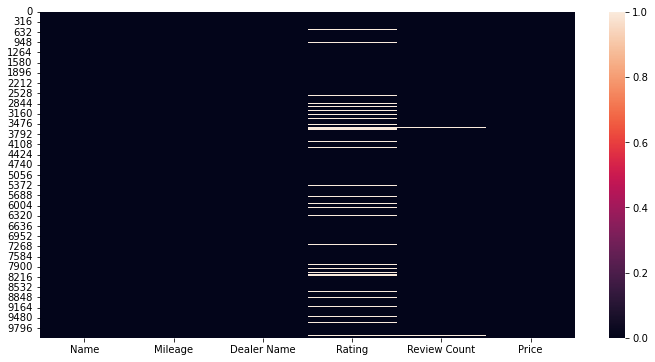

In [96]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

In [98]:
df['Rating'].isna().any()

True

In [100]:
df['Rating'].isnull().sum()

1174

In [102]:
df.shape

(10098, 6)

In [103]:
df.describe()

,Rating
count,8924.000000
mean,4.338133
std,0.664123
min,1.100000
25%,4.100000
50%,4.600000
75%,4.800000
max,5.000000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          10098 non-null  object 
 1   Mileage       10096 non-null  object 
 2   Dealer Name   10098 non-null  object 
 3   Rating        8924 non-null   float64
 4   Review Count  10024 non-null  object 
 5   Price         10098 non-null  object 
dtypes: float64(1), object(5)
memory usage: 473.5+ KB


In [105]:
import missingno as mno

<AxesSubplot:>

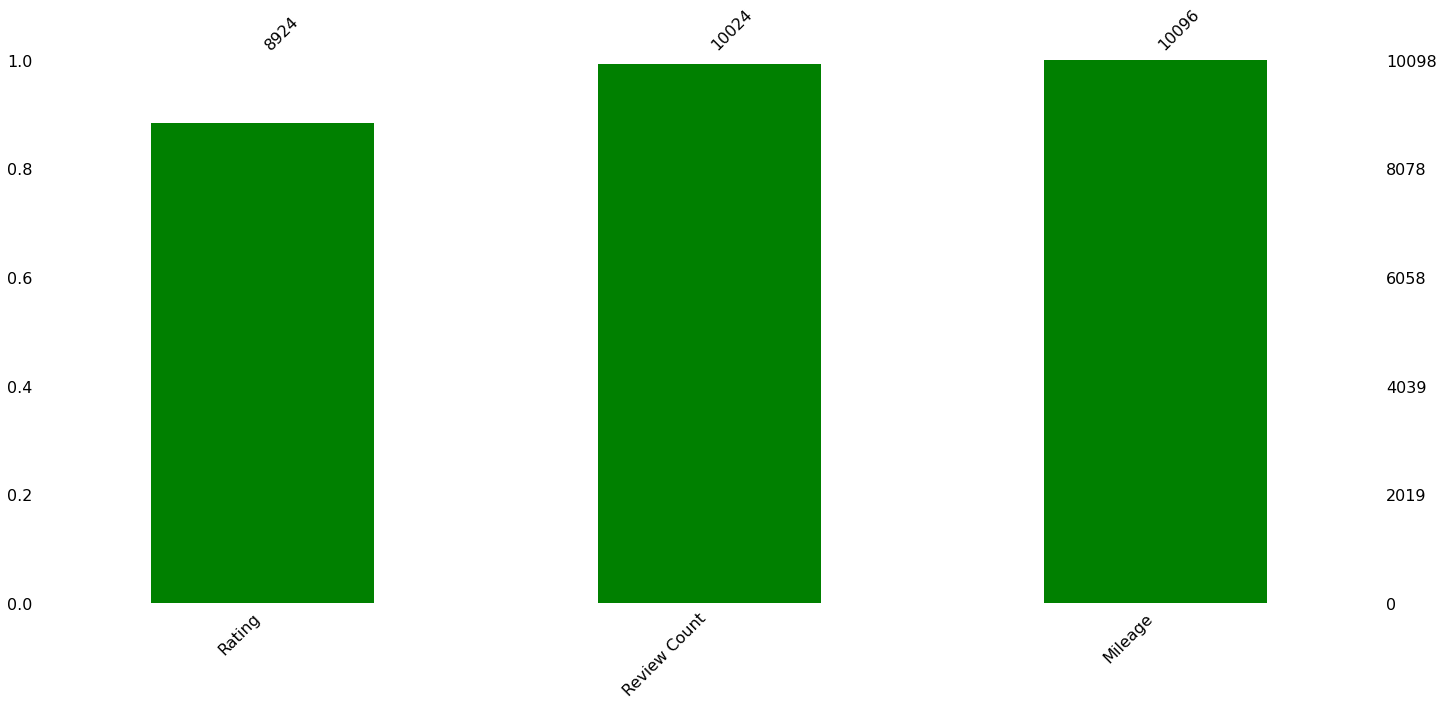

In [106]:
mno.bar(df[df.columns[df.isna().any()]], sort = 'ascending', color = 'green')

In [107]:
# Getting total number of NULL values and percentage of the columns
# null_columns = df.columns[df.isna().any()]
null_value_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)

In [108]:
null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])

In [109]:
null_data

,Count,Percentage
Rating,1174,11.626065
Review Count,74,0.732818
Mileage,2,0.019806


We dont need to drop any columns because as its below 15%

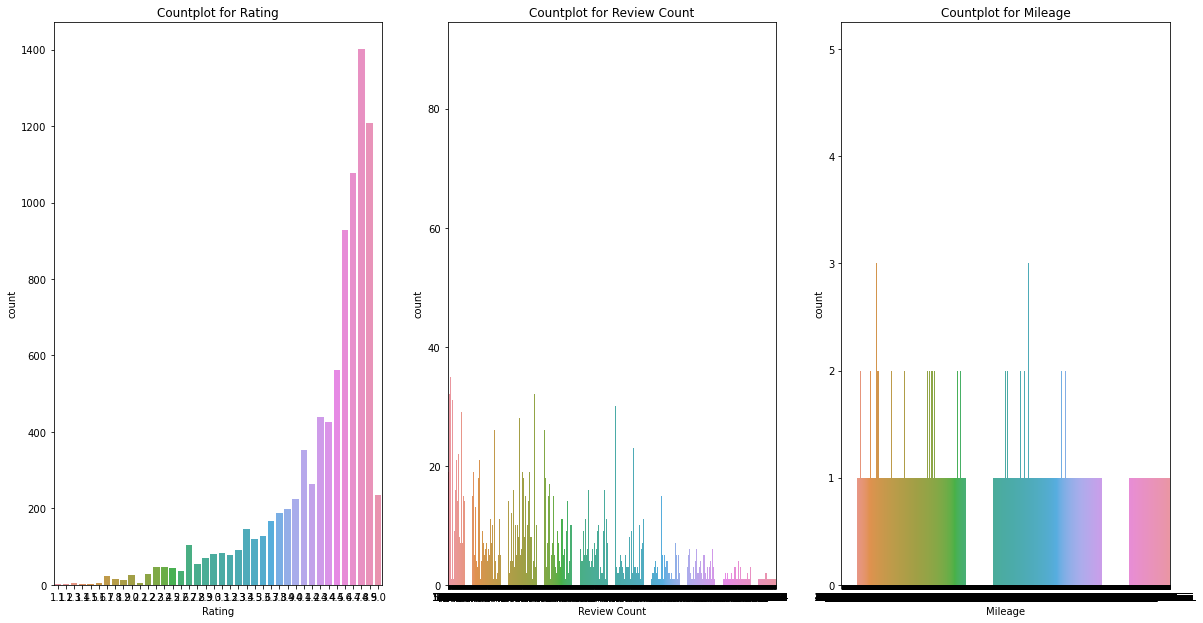

In [110]:
plt.figure(figsize=[20, 60])

for i, var in enumerate(null_data.index,start=1):
    plt.subplot(5,3,i)
    sns.countplot(df[var])
    plt.title(f"Countplot for {var}")